In [39]:
def D2(dimension):
    """Used to make a matrix that enables y''(x) = 1/h^2 * D2 * y(x).
    
    We want each row to have 1,-2,1 in it with the right-most 1 being on the diagonal. The simplist way to do
    this is the start with an under-sized matrix"""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 2 rows/columns shorter, and make its diagonal 1's
    matrix = np.zeros((dimension-2,dimension-2), int)
    np.fill_diagonal(matrix,1)
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-2,1))
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension-1))
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with -2
    np.fill_diagonal(matrix,-2)
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1))
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension))
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with 1
    np.fill_diagonal(matrix,1)
    
    
    
    
    return matrix

In [40]:
def func_diff2(initial_y, initial_yp, x_max, interv_num):
    """For any d2y/dx2="f(x)", we find that after some math, we get y(x+h)-2y(x)+y(x-h)=h^2*"f(x)",
    which becomes D2*y(x)=h^2*"f(x)"*[y(0);y'(0);1;1;...].
    This gives us y(x)=h^2*D2^{-1}*[y(0);y'(0);f(x_0);f(x_1);...;f(x_{n-2})]"""
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    
    begin = time()
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Make our array of dy/dx outputs
    # IMPORTANT
    ypp_val = x_val ** 2
    
    
    
    
    # Generate our I-matrix
    # Start with our initial value at y(0)
    i_matrix = np.array([initial_y,initial_yp])
    
    # Append the other values of "f(x)"
    i_matrix = np.append( i_matrix , ypp_val[:-2] )
    
    
    

    # Create our y-values based on our equation y(x) = (interval width^2) * (inverse D2) * (I matrix)
    y_val = (interv_width ** 2) * np.matmul( np.linalg.inv(D2(interv_num+1)) , i_matrix )
    
    
    
    
    # Plot our values and the EXACT SOLUTION
    plt.plot(x_val, y_val, color="black", linestyle="dotted")
    
    exact_y = (1/12) * x_val ** 4 + 3 * x_val + 2
    plt.plot(x_val, exact_y, color="black")
    
    
    
    
    # Set up cosmetic expectations and display the graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()
    
    end = time()
    print("Finished in "+str(end-begin)+" seconds.")

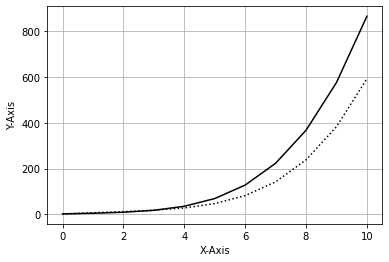

Finished in 0.08719301223754883 seconds.


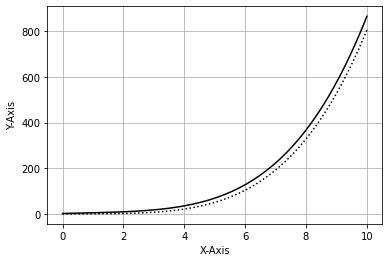

Finished in 0.07366776466369629 seconds.


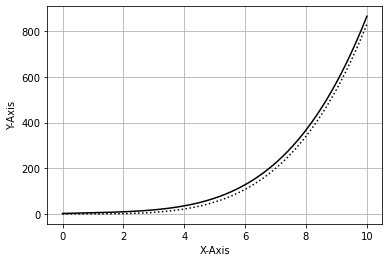

Finished in 0.14626145362854004 seconds.


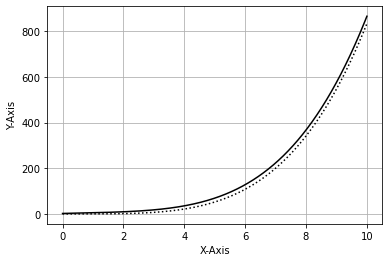

Finished in 30.17409324645996 seconds.


In [41]:
# Find the solution to y''(x)=x^2, y(0)=2, y'(0)=3, 0<x<10, n=1000
# Format is func_diff2(initial_y, initial_yp, x_max, interv_num)
func_diff2(2, 3, 10, 10)
func_diff2(2, 3, 10, 100)
func_diff2(2, 3, 10, 1000)
func_diff2(2, 3, 10, 10000)